# Time Series Project
 - Forecasting For Monthly Milk Production Using ARIMA/SARIMA and HOLT-WINTER Model

## Introduction
 - Milk is one of the main staple foods of a large portion of the world's population. It (milk) plays a vital role in meeting the desperate needs of food demand in urban and rural areas. Milk is an important part of a young child's diet. It is a good source of energy and protein, and contain a wide range of vitamins and minerals, including calcium. It will help young children build bones and keep teeth healthy. A lot of efforts have been made by the government of India to increase the productivity of milk to meet food demand and boost export. India is one of the largest producer of milk in the world, contributing 21% of global milk production. SARIMA/ARIMA and HOLT-WINTER EXPONENTIAL SMOOTHING are some of the most valuable forecasting techniques in predicting future events in time series analysis. The accuracy of the fitted models is identified through the Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE) and Mean Square Error (MSE).

## Objective
 - A comparative studyis performed to forecast the milk production in India for the next five years using ARIMA/SARIMA and Holt-Winter Exponential models with the help of accuracy measures. 

## Data Source
 - A time-series approach is used in the monthly milk production data, in terms of pounds per cow between 1962–1975.
 - Data collected from https://bigml.com/user/czuriaga/gallery/dataset/5a8dacbd2a834705180000ec

## Analysis with Coding
 - A comparative study is performed in this project. We imported the data, and then we could
see that there existed 168 observations.

In [4]:
# Import necessary libraries
import numpy as np
import seaborn as sns

# dataframe opertations - pandas
import pandas as pd

# plotting data - matplotlib
from matplotlib import pyplot as plt

# time series - statsmodels 
# Seasonality decomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# holt winters    
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from statsmodels.tools.eval_measures import rmse

# Scaling
from sklearn.preprocessing import MinMaxScaler

# LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [5]:
# Loading dataset
df=pd.read_csv("monthly-milk-production.csv", sep=',', parse_dates=['Month'], index_col='Month')
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


In [6]:
# dimension of the dataset
df.shape

(168, 1)

In [7]:
# statistical information about the dataset
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [8]:
# Checking missing values
df.isnull().sum()

Milk Production    0
dtype: int64

#### Normal Time Series Plot

<Axes: title={'center': 'Month Production'}, xlabel='Month'>

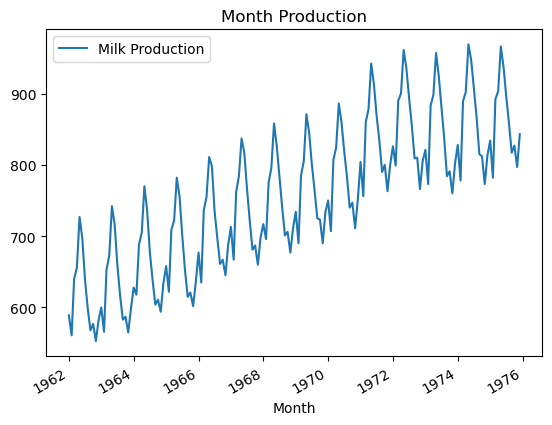

In [9]:
# Time series plot
df.plot(title='Month Production')

## Decomposing the Time Series

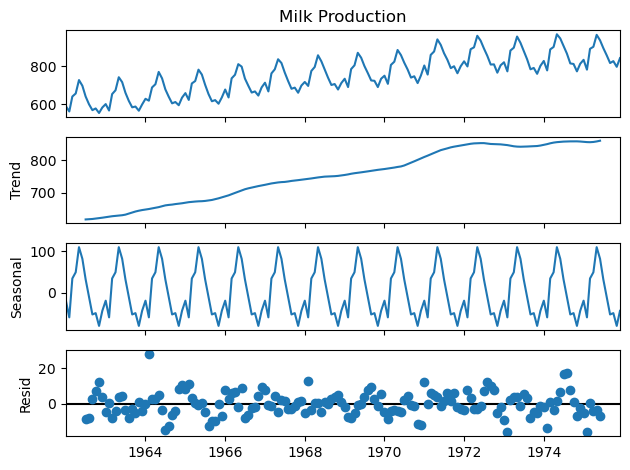

In [12]:
# Additive model
decomposition = seasonal_decompose(df['Milk Production'], model='additive')
decomposition.plot()
plt.show()

 - The decomposition plot indicates that the monthly milk production has an increasing trend and seasonal pattern.

## ACF and PACF
 - For stationarity check

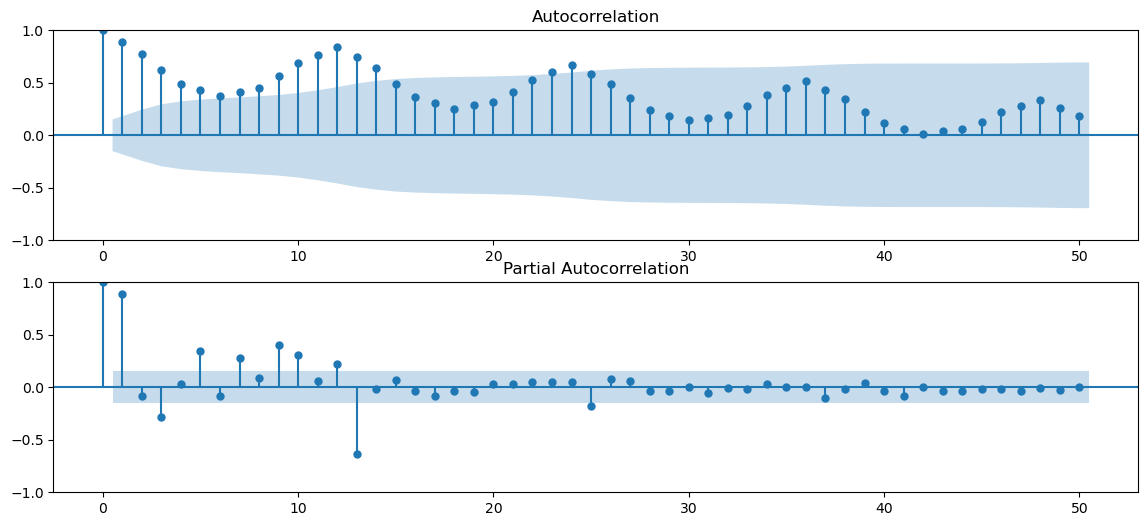

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df, lags=50, ax=ax1)
ax2 = plot_pacf(df, lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

- Here we see that both ACF and PACF plots do not show a quick cut off into the 95% confidence interval area (in blue) meaning time series is not stationary.

## Statistical test --- Dickey-Fuler Test
 - For stationarity check

- **Null Hypothesis: The data series is not stationary.**
- **Alternative Hypothesis: The data series is stationary.**

In [14]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Milk Production'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.303812
p-value                          0.627427
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


- So, we can see p-value(0.627427) grater than 0.05. So we can't reject the null hypothesis. So, we can conclude that the data series is not stationary.

## Making Time Series Data Stationary

In [15]:
df_diff = df.diff().diff(12)

In [16]:
df_diff.dropna(inplace=True)

In [18]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['Milk Production'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.038002
p-value                          0.000019
#Lags Used                      11.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


- So, here we can see p-value(0.000019) less than 0.05. So we reject the null hypothesis. So, we can conclude that the data series is stationary.

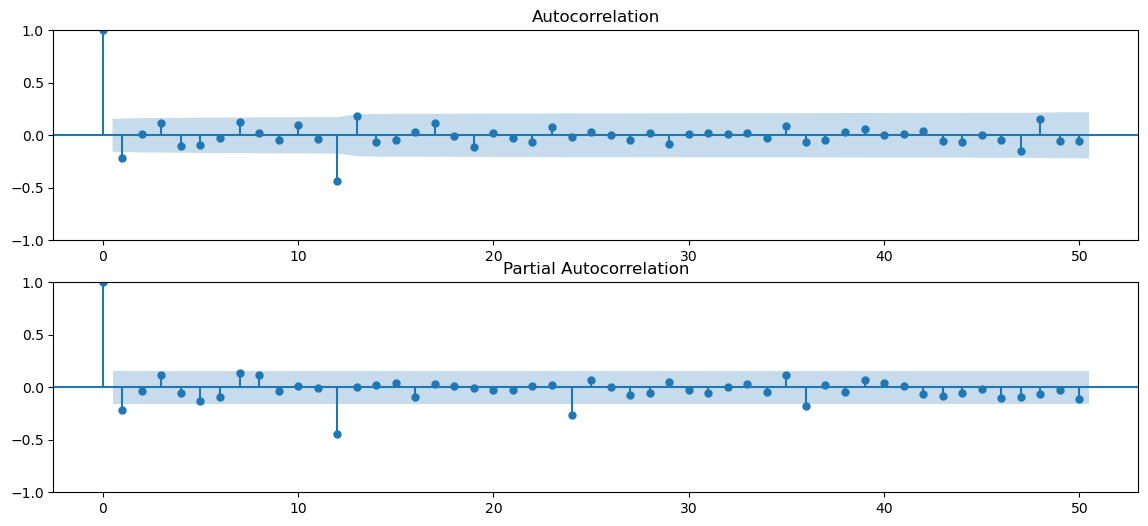

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df_diff, lags=50, ax=ax1)
ax2 = plot_pacf(df_diff, lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

- Here we see that both ACF and PACF plots have a quick cut off into the 95% confidence interval area (in blue) meaning time series is not stationary.

## ARIMA & SARIMA MODEL
 - ARIMA models are denoted with the order of ARIMA(p,d,q) and SARIMA models are denoted with the order of SARIMA(p, d, q)(P, D, Q)m.

 - AR(p) is a regression model that utilizes the dependent relationship between an observation and some number of lagged observations.

 - I(d) is the differencing order to make time series stationary.

 - MA(q) is a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

 - (P, D, Q)m, these parameters describe the seasonal components of the model. P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, and m represents the number of data points in each seasonal cycle.

## HOLT EXPONENTIAL SMOOTHING
 - Holt's two-parameter model, also known as linear, exponential smoothing, is a popular smoothing model for forecasting data with trends. Holt's model has three separate equations that work together to generate a final forecast. The first is a basic smoothing equation that directly adjusts the last smoothed value for the previous trend. The trend itself is updated over time through the second equation, where the movement is expressed as the difference between the last two smoothed values.

- **If the data has Trend and Seasonal component both, we can use SARIMA & Holt-Winters.**

- **If we remove Seasonality component, we can use ARIMA and Holt's Exponential.**

- **And if we remove Trend & Seasonality both, we can use ARMA & Simple Exponential as the data will be Stationary then.**

- So, in our case the data series is non-stationary. **So, we can use SARIMA & Holt-Winters.**

## Model Parameter Estimation
 - For automatically extracting the best parameters for Seasonal ARIMA model we will use Python’s pmdarima library. Inside auto_arima function, there are d=1 and D=1 beacause of differentiating once for the trend and once for seasonality, m=12 because of monthly data, and trend='c' to include constant and seasonal=True to fit a seasonal-ARIMA. Besides, we specify trace=True for printing status on the fits. This things gives us to find the best parameters by comparing the AIC scores.

In [21]:
# We will use Python’s pmdarima library, to automatically extract the best parameters for our Seasonal ARIMA model. 
model = pm.auto_arima(df['Milk Production'],
                      d=1, D=1, m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1076.128, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1121.939, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1083.569, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1068.286, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1116.950, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1070.017, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1069.963, Time=0.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1084.109, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1074.277, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1070.056, Time=0.26 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1069.791, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1068.200, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1116.800, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.100
Date:                              Thu, 30 Nov 2023   AIC                           1068.200
Time:                                      16:23:57   BIC                           1080.374
Sample:                                  01-01-1962   HQIC                          1073.145
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0211      0.287     -0.074      0.941      -0.584       0.542
ar.L1         -0.2254      0.079     -2.837      0.005      -0.381      -0.070
ma.S.L12      -0.6193      0.071     -8.694      0.000      -0.759      -0.480
sigma2        52.6875      5.100     10.332      0.000      42.693      62.682
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The result of auto_arima function with various parameters indicates that the lowest AIC score is obtained when the parameters equal to (1, 1, 0)(0, 1, 1, 12).

#### Splitting Dataset

<Axes: xlabel='Month'>

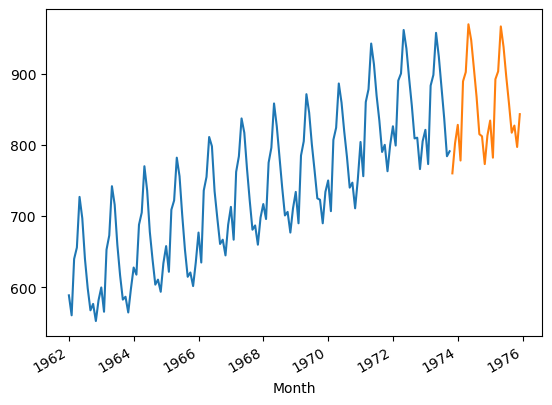

In [24]:
#divide into train and validation set
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

#plotting the data
train['Milk Production'].plot()
test['Milk Production'].plot()

## SARIMA Model

In [26]:
model = SARIMAX(train['Milk Production'],
                order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

C:\Users\alokg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alokg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Milk Production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Thu, 30 Nov 2023   AIC                            897.205
Time:                                      16:24:17   BIC                            905.785
Sample:                                  01-01-1962   HQIC                           900.691
                                       - 10-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0243      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Insample forecast

In [27]:
test_predictions=results.forecast(steps=len(test))
test_predictions

1973-11-01 01:00:00    752.778961
1973-12-01 01:00:00    791.711266
1974-01-01 01:00:00    816.606986
1974-02-01 01:00:00    775.713880
1974-03-01 01:00:00    876.542464
1974-04-01 01:00:00    891.673776
1974-05-01 01:00:00    952.581635
1974-06-01 01:00:00    923.402776
1974-07-01 01:00:00    880.274709
1974-08-01 01:00:00    839.963914
1974-09-01 01:00:00    792.911137
1974-10-01 01:00:00    798.315389
1974-11-01 01:00:00    760.529671
1974-12-01 01:00:00    799.343220
1975-01-01 01:00:00    824.271337
1975-02-01 01:00:00    783.369393
1975-03-01 01:00:00    884.200388
1975-04-01 01:00:00    899.331042
1975-05-01 01:00:00    960.239081
1975-06-01 01:00:00    931.060173
1975-07-01 01:00:00    887.932119
1975-08-01 01:00:00    847.621321
1975-09-01 01:00:00    800.568544
1975-10-01 01:00:00    805.972797
1975-11-01 01:00:00    768.187079
1975-12-01 01:00:00    807.000627
Freq: MS, Name: predicted_mean, dtype: float64

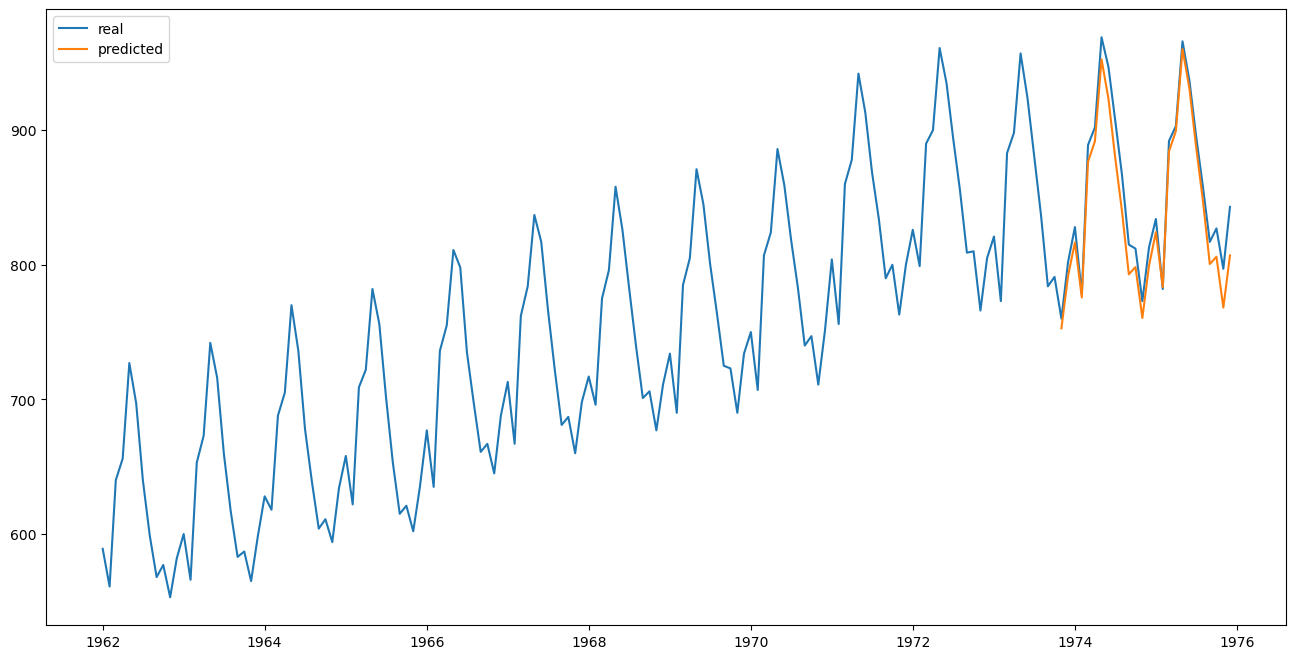

In [28]:
plt.figure(figsize=(16,8))

# Plot actual as line
plt.plot(df['Milk Production'].index, df['Milk Production'], label='real')

# Plot the prediction as line
plt.plot(test_predictions, label='predicted')

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [29]:
actual = test['Milk Production']
data = {'Actual': actual, 'Predicted': test_predictions}
actual_predicted=pd.DataFrame(data)
actual_predicted

,Actual,Predicted
1973-11-01 01:00:00,760.0,752.778961
1973-12-01 01:00:00,802.0,791.711266
1974-01-01 01:00:00,828.0,816.606986
1974-02-01 01:00:00,778.0,775.713880
1974-03-01 01:00:00,889.0,876.542464
1974-04-01 01:00:00,902.0,891.673776
1974-05-01 01:00:00,969.0,952.581635
1974-06-01 01:00:00,947.0,923.402776
1974-07-01 01:00:00,908.0,880.274709
1974-08-01 01:00:00,867.0,839.963914


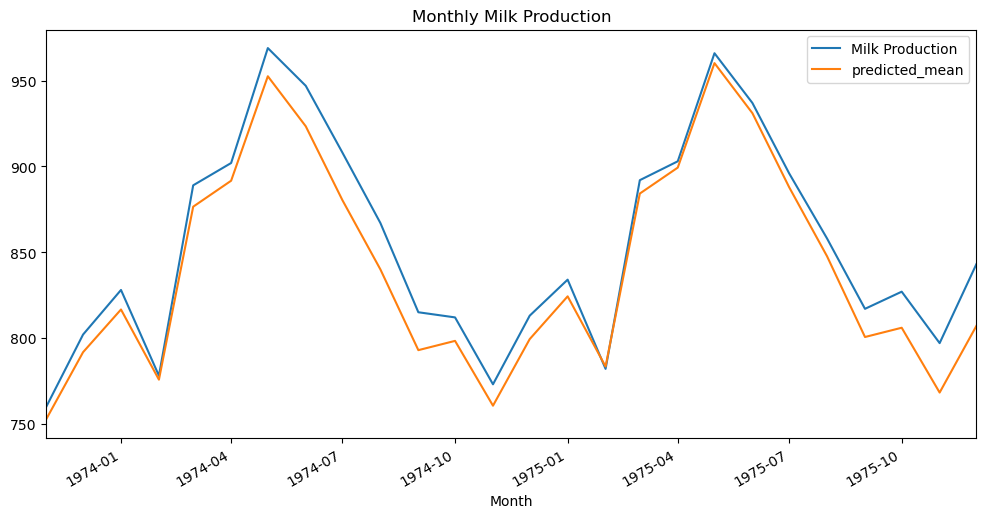

In [31]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Milk Production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

#### 1. Ljung-Box Test

## For checking Residuals Analysis
 - Residuals are uncorrelated.
 - Residuals are normally ditributed.

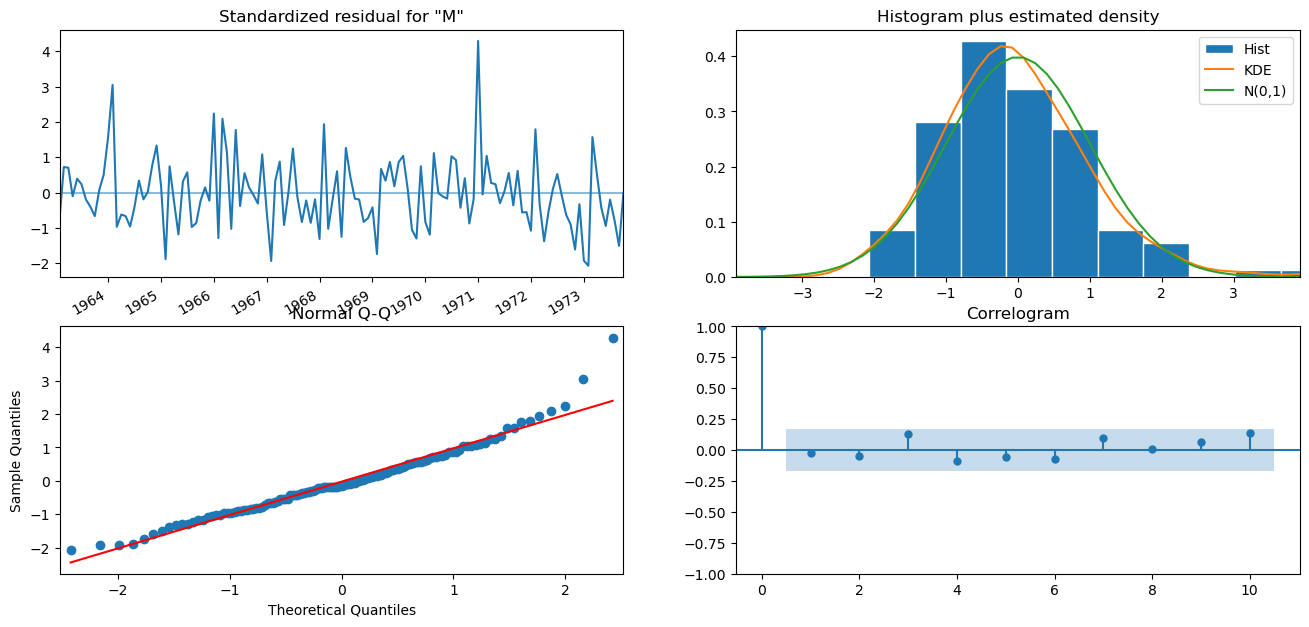

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

- Standardized residual plot shows the residuals over time and it appears to be a white noise with no seasonal component.
- Histogram with KDE plot shows that kde line (in red) closely follows the N(0,1) line, which is the standard notation of normal distribution with zero mean and standard deviation of 1, suggesting the residuals are normally distributed.
- Normal QQ-plot shows ordered distribution of residuals (in blue) closely follow the linear trend of the samples taken from a standard normal distribution, suggesting residuals are normally distributed.
- Correlogram plot indicating residuals have a low correlation with lagged versions.

## Statitical Test  -- Ljung-Box Test**
   - For checking uncorrelated or not.

- **Null Hypothesis: The data are independently distributed, no autocorrelation.**
- **Alternative Hypothesis: The data are not independently distributed; they exhibit serial correlation.**

In [33]:
# 3. Ljung-Box residual test on our best model => model2 => ARIMA(3,2,2)(0,1,0)[12]
# For determining max. lags for L-B test, we will use folling formulae :
# h = min(10,n/5) --- for non-seasonal TS
# h = min(2m,n/5) --- for seasonal TS
# n = length of time series
# m = seasonal period

# In our case, we have seasonal ts 
n = len(train)
m = 12
h = min(2*m,n/5)
print ('Results of Ljung-Box Test:')
sm.stats.acorr_ljungbox(x = results.resid,lags = [h], return_df = True)

Results of Ljung-Box Test:


,lb_stat,lb_pvalue
24,28.371432,0.244686


- So, we can see p-value(0.244685) greater than 0.05. So we can't reject null hypothesis. So, we can conclude that the data are independently distributed, no autocorrelation means uncorrelated.

- **So, we can tell that suggest residuals for SARIMA model are normally distributed with low correlation.**

#### Evaluation Metrics

In [35]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Milk Production'], test_predictions)}, index=['test_sarima'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Milk Production'], test_predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Milk Production'], test_predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Milk Production'], test_predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(test_predictions - test['Milk Production'])/np.abs(test['Milk Production']))*100


test_metrics= evaluation_results
test_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924043,14.062889,274.940627,16.581334,1.649905


In [37]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(train['Milk Production'], results.fittedvalues)}, index=['train_sarima'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(train['Milk Production'], results.fittedvalues)
evaluation_results['mean_squared_error'] = mean_squared_error(train['Milk Production'], results.fittedvalues)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(train['Milk Production'], results.fittedvalues))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(results.fittedvalues - train['Milk Production'])/np.abs(train['Milk Production']))*100 

train_metrics = evaluation_results
train_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
train_sarima,0.664216,14.279955,3179.248739,56.384827,2.210032


In [38]:
em1 = pd.concat([test_metrics,train_metrics])
em1

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924043,14.062889,274.940627,16.581334,1.649905
train_sarima,0.664216,14.279955,3179.248739,56.384827,2.210032


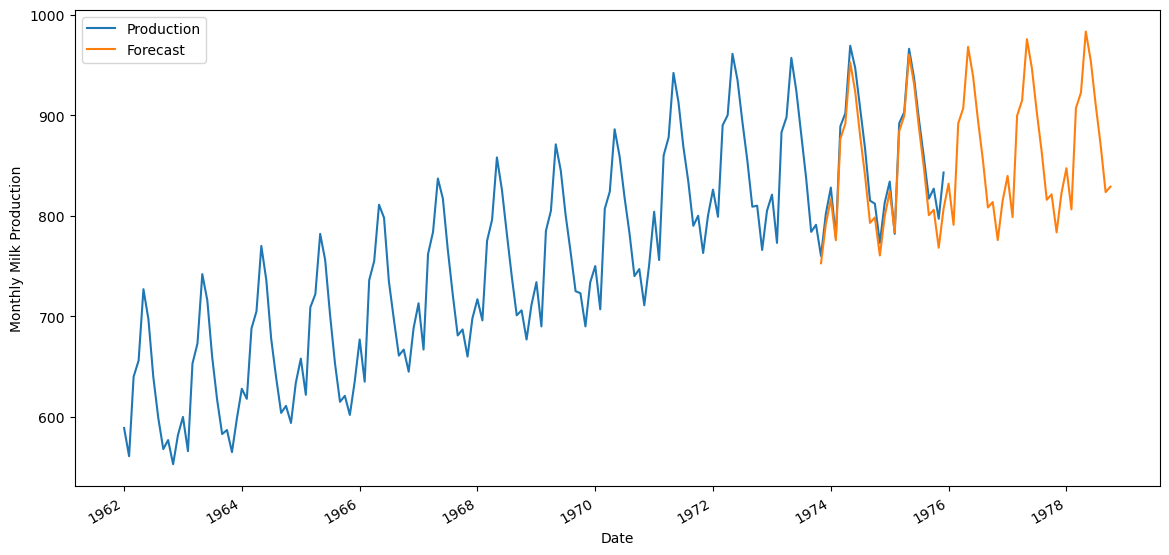

In [40]:
# Outsample forecast
pred_f = results.forecast(steps=60)
ax = df['Milk Production'].plot(label='Production', figsize=(14, 7))
pred_f.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Milk Production')
plt.legend()
plt.show()

# Holt-Winter

In [41]:
fitted_model = ExponentialSmoothing(train['Milk Production'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\alokg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### Insample forecast

In [42]:
test_predictions_hw=fitted_model.forecast(steps=len(test))
test_predictions_hw

1973-11-01 01:00:00    763.676424
1973-12-01 01:00:00    800.947707
1974-01-01 01:00:00    827.391653
1974-02-01 01:00:00    791.808057
1974-03-01 01:00:00    883.304810
1974-04-01 01:00:00    900.643129
1974-05-01 01:00:00    962.976502
1974-06-01 01:00:00    936.147485
1974-07-01 01:00:00    886.724847
1974-08-01 01:00:00    845.971925
1974-09-01 01:00:00    806.053847
1974-10-01 01:00:00    811.552060
1974-11-01 01:00:00    783.450099
1974-12-01 01:00:00    820.721382
1975-01-01 01:00:00    847.165328
1975-02-01 01:00:00    811.581731
1975-03-01 01:00:00    903.078484
1975-04-01 01:00:00    920.416803
1975-05-01 01:00:00    982.750177
1975-06-01 01:00:00    955.921160
1975-07-01 01:00:00    906.498522
1975-08-01 01:00:00    865.745600
1975-09-01 01:00:00    825.827521
1975-10-01 01:00:00    831.325735
1975-11-01 01:00:00    803.223773
1975-12-01 01:00:00    840.495056
Freq: MS, dtype: float64

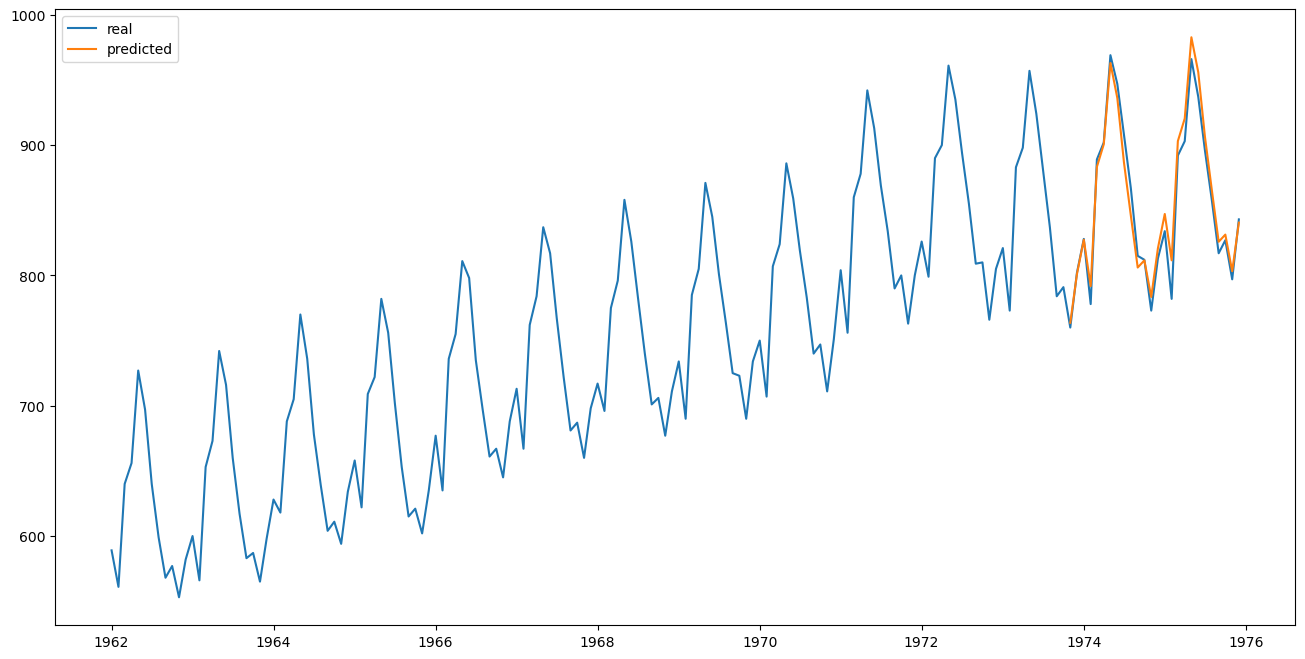

In [45]:
plt.figure(figsize=(16,8))

# Plot past CO2 levels
plt.plot(df['Milk Production'].index, df['Milk Production'], label='real')

# Plot the prediction means as line
plt.plot(test_predictions_hw, label='predicted')

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [46]:
actual = test['Milk Production']
data1 = {'Actual': actual, 'Predicted': test_predictions_hw}
actual_predicted1=pd.DataFrame(data1)
actual_predicted1

,Actual,Predicted
1973-11-01 01:00:00,760.0,763.676424
1973-12-01 01:00:00,802.0,800.947707
1974-01-01 01:00:00,828.0,827.391653
1974-02-01 01:00:00,778.0,791.808057
1974-03-01 01:00:00,889.0,883.304810
1974-04-01 01:00:00,902.0,900.643129
1974-05-01 01:00:00,969.0,962.976502
1974-06-01 01:00:00,947.0,936.147485
1974-07-01 01:00:00,908.0,886.724847
1974-08-01 01:00:00,867.0,845.971925


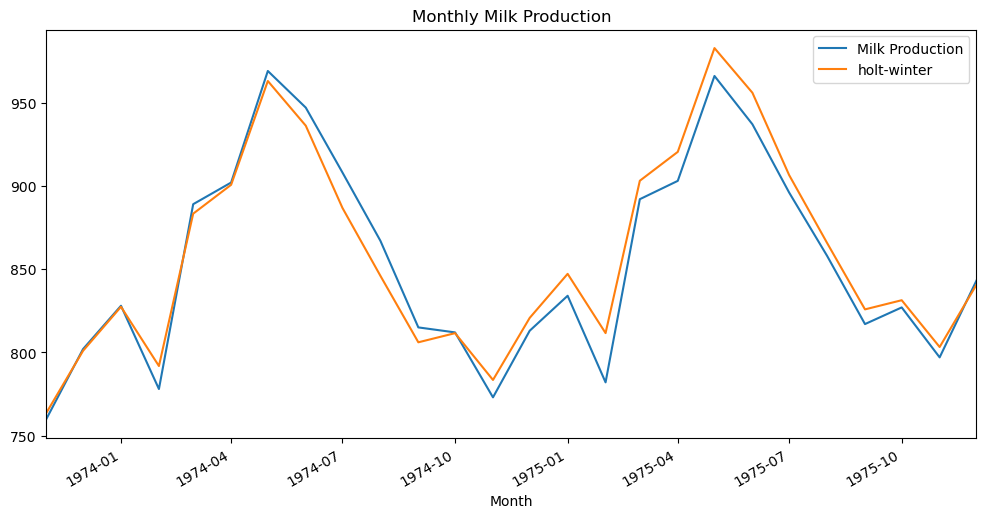

In [48]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Milk Production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions_hw.plot(legend=True,label='holt-winter')
ax.autoscale(axis='x',tight=True)

#### Checking normality of residuals using distribution plot and q-q plot

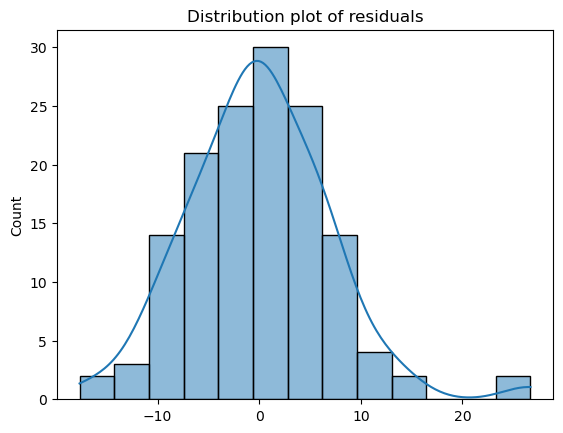

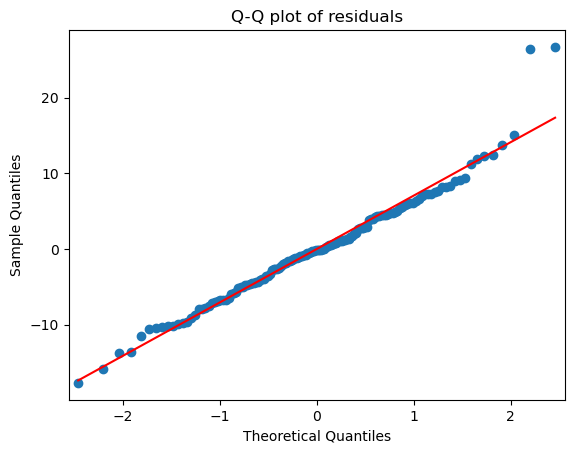

In [49]:
plt.figure()
sns.histplot(fitted_model.resid, kde = True)
plt.title('Distribution plot of residuals')
sm.qqplot(fitted_model.resid, line = 'r')
plt.title('Q-Q plot of residuals')
plt.show()

- Normal QQ-plot and Histogram with KDE plot both shows ordered distribution of residuals closely follow the linear trend of the samples taken from a standard normal distribution, suggesting residuals are normally distributed.

## Statitical Test --- Ljung-Box Test
 - For checking autocorrelation

- **Null Hypothesis: The data are independently distributed, no autocorrelation.**
- **Alternative Hypothesis: The data are not independently distributed; they exhibit serial correlation.**

In [50]:
print ('Results of Ljung-Box Test:')
sm.stats.acorr_ljungbox(fitted_model.resid, lags=[12], return_df=True)

Results of Ljung-Box Test:


,lb_stat,lb_pvalue
12,11.917108,0.45236


- So, we can see p-value(0.450527) greater than 0.05. So we can't reject null hypothesis. So, we can conclude that the data are independently distributed, no autocorrelation means uncorrelated.

- **So, we can tell that suggest residuals for Holt-Winter model are normally distributed with low correlation.**

#### Evaluation Metrics

In [51]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Milk Production'], test_predictions_hw)}, index=['test_holt-winter'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Milk Production'], test_predictions_hw)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Milk Production'], test_predictions_hw)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['Milk Production'], test_predictions_hw))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(test_predictions_hw - test['Milk Production'])/np.abs(test['Milk Production']))*100 


test_metrics1= evaluation_results
test_metrics1


,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_holt-winter,0.957893,9.999299,152.414777,12.345638,1.16486


In [53]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(train['Milk Production'], fitted_model.fittedvalues)}, index=['train_holt-winter'])
evaluation_results['mean_absolute_error'] = mean_absolute_error(train['Milk Production'], fitted_model.fittedvalues)
evaluation_results['mean_squared_error'] = mean_squared_error(train['Milk Production'], fitted_model.fittedvalues)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(train['Milk Production'], fitted_model.fittedvalues))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(fitted_model.fittedvalues - train['Milk Production'])/np.abs(train['Milk Production']))*100 


train_metrics1 = evaluation_results
train_metrics1

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
train_holt-winter,0.994859,5.256546,48.679677,6.977082,0.729447


In [54]:
em2 = pd.concat([test_metrics1,train_metrics1])
em2

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_holt-winter,0.957893,9.999299,152.414777,12.345638,1.164860
train_holt-winter,0.994859,5.256546,48.679677,6.977082,0.729447


# SARIMA and Holt-Winter Model Comparison 

### Actual and Predicted values of SARIMA and Holt-Winter model

In [55]:
actual = test['Milk Production']
data = {'Actual': actual, 'Predicted_SARIMA': test_predictions, 'Predicted_Holt-Winter': test_predictions_hw}
actual_predicted=pd.DataFrame(data)
actual_predicted

,Actual,Predicted_SARIMA,Predicted_Holt-Winter
1973-11-01 01:00:00,760.0,752.778961,763.676424
1973-12-01 01:00:00,802.0,791.711266,800.947707
1974-01-01 01:00:00,828.0,816.606986,827.391653
1974-02-01 01:00:00,778.0,775.713880,791.808057
1974-03-01 01:00:00,889.0,876.542464,883.304810
1974-04-01 01:00:00,902.0,891.673776,900.643129
1974-05-01 01:00:00,969.0,952.581635,962.976502
1974-06-01 01:00:00,947.0,923.402776,936.147485
1974-07-01 01:00:00,908.0,880.274709,886.724847
1974-08-01 01:00:00,867.0,839.963914,845.971925


### Plot of Actual and Predicted values of SARIMA and Holt-Winter model

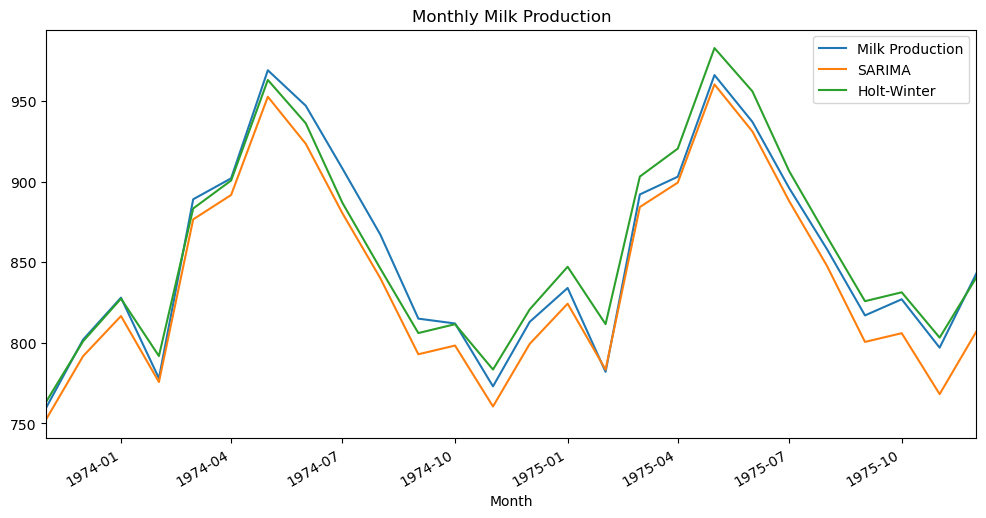

In [56]:
# Plot predictions against known values
title = 'Monthly Milk Production'
ax = test['Milk Production'].plot(legend=True,figsize=(12,6),title=title)
test_predictions.plot(legend=True, label='SARIMA')
test_predictions_hw.plot(legend=True,label='Holt-Winter')
ax.autoscale(axis='x',tight=True)

### Evaluation metrics for SARIMA and Holt-Winter model

In [57]:
em3 = pd.concat([em1,em2])
em3

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
test_sarima,0.924043,14.062889,274.940627,16.581334,1.649905
train_sarima,0.664216,14.279955,3179.248739,56.384827,2.210032
test_holt-winter,0.957893,9.999299,152.414777,12.345638,1.164860
train_holt-winter,0.994859,5.256546,48.679677,6.977082,0.729447


In [58]:
# Getting index as a column of dataframe
em3['index'] = em3.index
em3

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error,index
test_sarima,0.924043,14.062889,274.940627,16.581334,1.649905,test_sarima
train_sarima,0.664216,14.279955,3179.248739,56.384827,2.210032,train_sarima
test_holt-winter,0.957893,9.999299,152.414777,12.345638,1.164860,test_holt-winter
train_holt-winter,0.994859,5.256546,48.679677,6.977082,0.729447,train_holt-winter


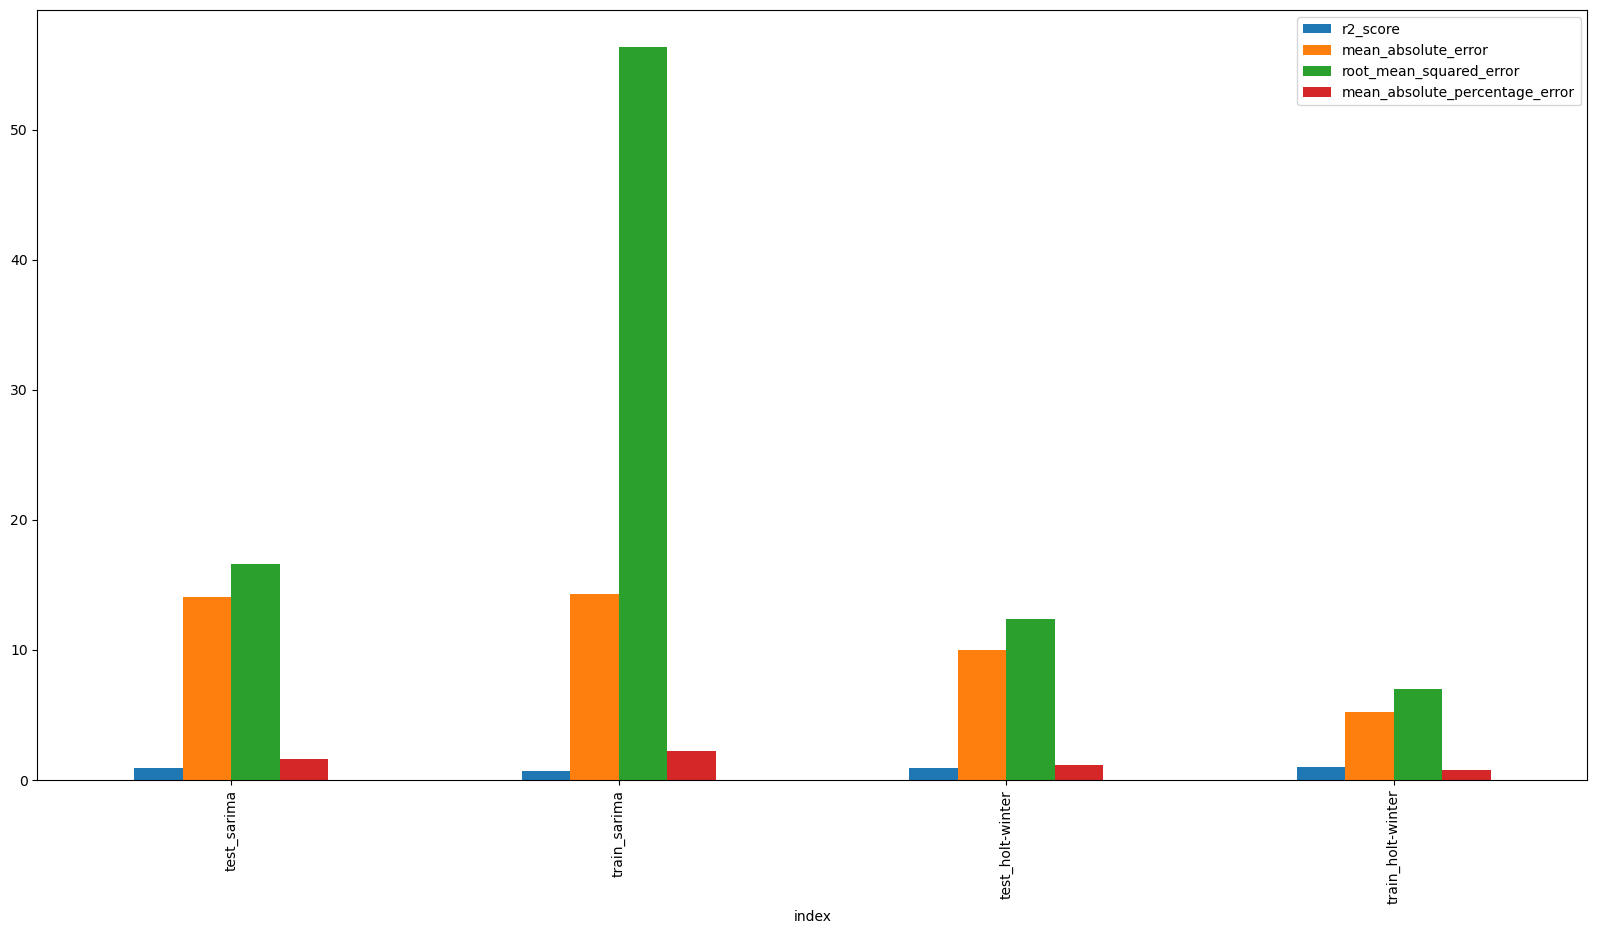

In [59]:
# plot the dataframe
em3.plot(x='index', y=["r2_score", "mean_absolute_error", "root_mean_squared_error", "mean_absolute_percentage_error"], kind="bar", figsize=(20, 10))
 
# print bar graph
plt.show()

- So, from this graph we can tell that the Holt-Winter model is a better model with less mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error values and with greater r2_score values than SARIMA.
- Let's forecast the next 5 years means next 60 months values using Holt-Winter model.

## Outsample Forecasting using the best model (Holt-Winter)

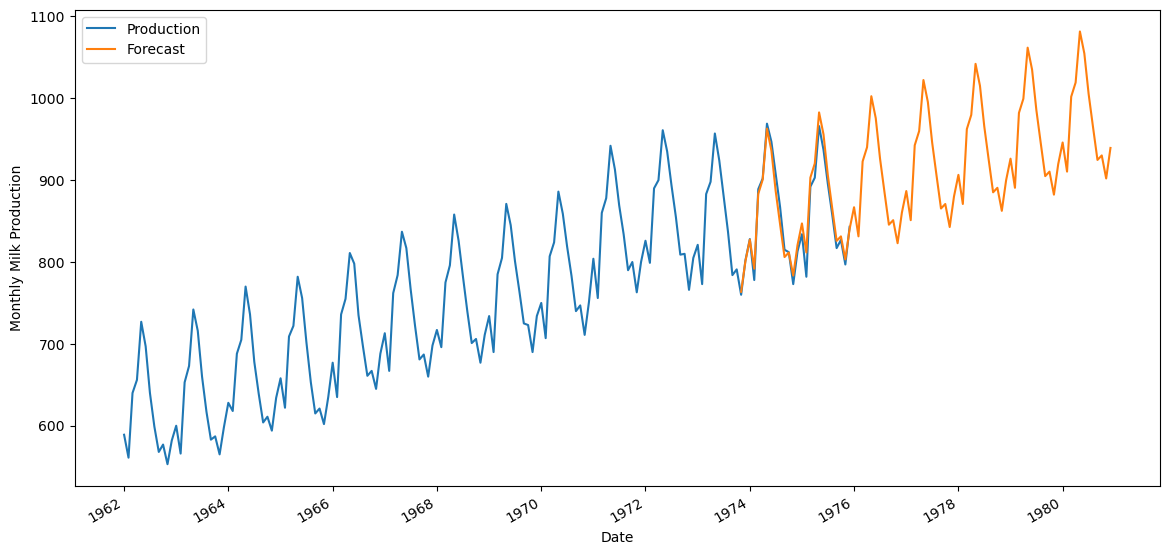

In [60]:
# Outsample forecast
pred_f = fitted_model.forecast(steps=86)
ax = df['Milk Production'].plot(label='Production', figsize=(14, 7))
pred_f.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Milk Production')
plt.legend()
plt.show()

In [61]:
pd.DataFrame(pred_f.iloc[26:])

,0
1976-01-01 01:00:00,866.939002
1976-02-01 01:00:00,831.355406
1976-03-01 01:00:00,922.852159
1976-04-01 01:00:00,940.190478
1976-05-01 01:00:00,1002.523851
1976-06-01 01:00:00,975.694834
1976-07-01 01:00:00,926.272196
1976-08-01 01:00:00,885.519274
1976-09-01 01:00:00,845.601196
1976-10-01 01:00:00,851.099409


- Finally we have forecasted using Holt-Winter exponential smoothing for the next 5 years milk production monthly wise in India.

# Conclusion
 - Forecasting is a more important problem in the fields of business and industry, economics, medicine, finance and it's used for planning and decision making. In this study, we have computed the milk productions monthly wise in India. The predicted values are nearest to the actual values and some of the forecasting values are the more nearest to the actual values.
 - The model verified with the available observed data with the forecasted from 1962 to 1975, the available observed value is almost nearest to the forecasted value for exponential smoothing. The advantage of Holt-Winter exponential smoothing method given better accuracy in RMSE, MAPE, MAE, MSE, r2 score comparing with SARIMA. 
 - This model forecasted production revealed an increase in the prices of milk in the future years and also demand for cows. Hence, increase in the area of production and their sale in the suitable markets can be planned suitably. Hence the method used is Holt-Winter exponential smoothing to forecast the future values.